Project 1 

**Through the economics course: ECON 433, The Economics of Big Data, I analyzed large-scale nationwide mobile tracking data (2018–2022) alongside historical stock price data for a major U.S. retail chain. Using Python (pandas, NumPy, matplotlib), I cleaned and reshaped raw weekly mobility records into a daily panel dataset, performed exploratory data analysis, and visualized key trends such as seasonality and COVID-19 behavioral shifts. I then compared mobility patterns to the company’s stock price movements to identify broader consumer and market dynamics. This project strengthened my skills in data wrangling, automation, time-series analysis, and visualization using large datasets.** **Below is a running list of comments and observations made from my data analysis, followed by code and data visualization.**




A variable we can look at that draws a link between the stock price sample and wideset sample is visits_by_day and date range start/end. An increase/decrease in visits per day can cause fluxuations in stock price, aliging with the respective date ranges.

The weekly summaries are far more detailed in terms of variables that are given. For example, the weekly summary data contains 12 variable opposed to stock price which has only three. Another diffference is the granularity of time data, the weekly summary gives a date range, whereas the stock price data gives a singular date. Finally, the focal point in the stock price data is described with a ticker, whereas in the weekly summary it is denoted to the full company name. 

I would anticipate that a main difficulty with merging these two datasets are the time stamps. One having a singluar date, the other having a range might cause duplicate data or miscalculations.

Numbers of variables in cleaned wide sample: 18

Outliers can arise for several reasons in this dataset. When discussing the variable 'visits per day', it is not unusual to have high volume days scattered in the dataset as promotions such as Black Friday exist, which drives people to visit stores at an unusually high rate. Conversely, there may be days where no one goes to the store due to something like bad weather conditions. 

I chose to denote the threshold to the 90th percentile, meaning manyvisits is defined by the top 10% of highest  volume visit days. Using a percentage cutoff is helpful because different stores experience different volumes of 
daily visits, this levels the observation field.Potomac has the highest # of manyvisits observations. It also has the highest percentage of manyvisit observations. Lululemon appeals to the wealthier class of consumers, which Potomac has a surplus of (being among the wealthiest areas in Maryland).

a. The variables that allow us to draw a link between the two datasets is time series data, or in the instance: date. Both datasets are tracked by daily visits and daily stock price, conceptually, this shared variable makes the most sense if we would like to conduct regression analysis.

b. There are a few key differences between the two datasets. The first is the summarization level.  The mobile tracking data follows how many visits a singular store gets per day, while the stock dataset tells us the stock price per day of the WHOLE company. Another difference is the unit of measurement. The mobile tracking data uses visits per day, while the stock data uses dollars per day. Finally, the coverage of the calendar is differentiated between the two. Mobile tracking data uses everyday of the week for its information, while the stock data only tracks Mon-Fri-the days the stock market is open.  

3.1
a: I chose 5 dailyvisits as a bin range because it demonstrates the distribution and trend in a useful light. Had I chosen a range too small, the graph would look too sporadic and irregular because too many bars would be created. If I chose a range too long, one would not be able to pick up on a detailed engouh trend to draw a conclusion abnout the data. 

g: A difference in the two sets in this chart is that prior to COVID, there was a much higher rate of dailyvisits. 
Another difference that should be noted is the variation of dailyvisit declines by city. 
Some cities saw a large drop in daily visits, others less so.

j: In the chart, we can observe that there is a steep drop in dailyvisits after March 2020. Another observation that can be made is the gradual return normality (of dailyvisit rate) following March 2020.

k: Again, we are able to observe the COVID trend in this chart, and dailyvisits sharply taper off in 2020-H1. Although the line charts indicated a dramatic decline in the mean and median visits around March 2020, the boxplot indicates that this decrease also accompanied a reduced range of the visits- the visits were generally low across the stores at the beginning of the first lockdown.

3.2
c: Again, we can observe a similar trend in this graph, as stock prices crashed in March 2020, and sharply rebounded in the following months. Another observation that can be made is the volatility in stock price following the COVID rebound. In late 2021, LULU stock crashed after reaching an all time high, but then slowly works its way back to normalcy, increasing in value gradually. Which coudl stem from a number of reasons such as profit-taking from investors, value correction, or macroeconomic headwinds.
a: Yes, seasonality can be observed in both data sets. For the dailyvisits dataset, we can observe significant increases in dailyvisits at the end of the year, followed by a steep drop at the beginning of the new year. For the stock price data, we actually observe a similar trend, however with less intensity in movement. Towards the end of the year, stock price tends to increase in value, followed by a decent-to-large drop in price when the new year comes around. 
b: Yes, we can definitely draw correlation between the dailyvisit data and stock price data. We can observe a positive correlation between daily visits and stock price; stock price has a positive relationship with dailyvisits. Meaning that when dailyvisits rise, so will stock price- and when daily visits falls, stock price will too. In this case, stock price is dependent on dailyvisits. This makes economic sense because an increase of daily visits will most likely increase revenue, which is a major component of success for a retail clothes chain like Lululemon. Secondly, a high rate of daily visits is associated with high consumer confidence in the brand which drives positive sentiment/confidence over future expectations/profits- which will therefore boost investor confidence and valuation.
c: Yes, the pandemic had similar imapcts on each data set, however not to the same degree. Dailyvisits dropped off by a much stronger degree than stock price did. A possible explanation for this could be that consumers were physcially restricted from visiting store in person, which entirely dictates the dailyvists value. However, stock price is determined by many more variables. Their presence of online retailing and healthly financial records could have been responsible for their stock price not going down with the same level of severity as dailyvisits. 


In [6]:
import pandas as pd
#file path 
file_path ="/Users/danielperalta-harris/Downloads/ECON433/AllStocks_2018_2022_clean.csv"
df = pd.read_csv(file_path)

In [7]:
df_LULU = df[df["ticker"] == "LULU"]
len(df_LULU)

1259

In [8]:
earliest_date = df_LULU["date"].min()
latest_date   = df_LULU["date"].max()
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: 2018-01-02
Latest date: 2022-12-30


In [9]:
df_LULU.to_csv("LULU_stock_price_sample.csv", index=False)
import os
os.getcwd()

'/Users/danielperalta-harris'

In [10]:
import pandas as pd

file_path2 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2018_sample.csv.gz"
df2 = pd.read_csv(file_path2, compression='gzip', low_memory=False)

file_path3 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2019_sample.csv.gz"
df3 = pd.read_csv(file_path3, compression='gzip', low_memory=False)

file_path4 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2020_sample.csv.gz"
df4 = pd.read_csv(file_path4, compression='gzip', low_memory=False)

file_path5 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2021_sample.csv.gz"
df5 = pd.read_csv(file_path5, compression='gzip', low_memory=False)

file_path6 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2022_sample.csv.gz"
df6 = pd.read_csv(file_path6, compression='gzip', low_memory=False)

In [11]:
df_2 = df2[df2["brands"] == "lululemon athletica"]
df_3 = df3[df3["brands"] == "lululemon athletica"]
df_4 = df4[df4["brands"] == "lululemon athletica"]
df_5 = df5[df5["brands"] == "lululemon athletica"]
df_6 = df6[df6["brands"] == "lululemon athletica"]

In [12]:
df_lululemon_athletica_all = pd.concat([df_2, df_3, df_4, df_5, df_6], ignore_index=True)
print("Total lululemon athletica observations:", len(df_lululemon_athletica_all))

Total lululemon athletica observations: 130559


In [13]:
df_lululemon_athletica_all.to_csv("lululemon_athletica_stock_price_sample.csv", index=False)
import os
os.getcwd()

'/Users/danielperalta-harris'

In [14]:
# First, import pandas and create or load the DataFrame
import pandas as pd

# Option 1: Create a sample DataFrame if you're testing
df_gap_all = pd.DataFrame({
    "date_range_start": ["2022-01-01", "2022-02-01", "2022-03-01"],
    "date_range_end": ["2022-01-31", "2022-02-28", "2022-03-31"]
})

# Option 2: Load your data from a file
# df_gap_all = pd.read_csv("your_file.csv")  # Uncomment and modify as needed

# Now proceed with your original code
df_gap_all["date_range_start"] = pd.to_datetime(df_gap_all["date_range_start"], errors="coerce")
df_gap_all["date_range_end"] = pd.to_datetime(df_gap_all["date_range_end"], errors="coerce")
begin_date = df_gap_all["date_range_start"].min()
end_date = df_gap_all["date_range_end"].max()
print("Beginning date in wide sample:", begin_date.date())
print("Ending date in wide sample:", end_date.date())

Beginning date in wide sample: 2022-01-01
Ending date in wide sample: 2022-03-31


In [15]:
df_lululemon_athletica_all.head(3)

,placekey,safegraph_brand_ids,brands,top_category,naics_code,city,region,postal_code,date_range_start,date_range_end,raw_visit_counts,visits_by_day
0,zzw-22q@627-w4b-hyv,SG_BRAND_44427b89ae7ee3ac12514dd4cc220a1c,lululemon athletica,Clothing Stores,448190,Edison,NJ,08837,2018-01-01T00:00:00-05:00,2018-01-08T00:00:00-05:00,NaN,NaN
1,zzy-229@5pb-vd7-4jv,SG_BRAND_44427b89ae7ee3ac12514dd4cc220a1c,lululemon athletica,Clothing Stores,448190,Rochester,MN,55902,2018-01-01T00:00:00-06:00,2018-01-08T00:00:00-06:00,187.0,"[14,35,29,32,34,26,17]"
2,224-222@5z6-3gy-75z,SG_BRAND_44427b89ae7ee3ac12514dd4cc220a1c,lululemon athletica,Clothing Stores,448190,Torrance,CA,90503,2018-01-01T00:00:00-08:00,2018-01-08T00:00:00-08:00,178.0,"[29,26,29,22,25,31,16]"


In [16]:
print(df_lululemon_athletica_all.dtypes)

placekey                object
safegraph_brand_ids     object
brands                  object
top_category            object
naics_code               int64
city                    object
region                  object
postal_code             object
date_range_start        object
date_range_end          object
raw_visit_counts       float64
visits_by_day           object
dtype: object


In [17]:
unique_cities = df_lululemon_athletica_all["city"].nunique()
print("Unique cities with lululemon athletica stores:", unique_cities)

Unique cities with lululemon athletica stores: 842


In [42]:
# 1) Convert to datetime, coercing bad values into NaT
df_wide_clean["date_range_start"] = pd.to_datetime(
    df_wide_clean["date_range_start"], errors="coerce"
)

# 2) Drop rows where date_range_start could not be parsed
df_wide_clean = df_wide_clean.dropna(subset=["date_range_start"]).copy()

# 3) Melt dailyvisits1..7 into one column
daily_cols = [f"dailyvisits{i}" for i in range(1, 8)]
df_long = df_wide_clean.melt(
    id_vars=[c for c in df_wide_clean.columns if c not in daily_cols],
    value_vars=daily_cols,
    var_name="day_index",
    value_name="dailyvisits"
)

# 4) Compute the actual calendar date (week start + offset)
df_long["day_num"] = df_long["day_index"].str.extract(r"(\d+)").astype(int)
df_long["date"] = df_long["date_range_start"] + pd.to_timedelta(df_long["day_num"] - 1, unit="D")

# 5) Ensure dailyvisits is integer (fill NaN with 0)
df_long["dailyvisits"] = pd.to_numeric(df_long["dailyvisits"], errors="coerce").fillna(0).astype("Int64")

# 6) Keep useful columns (optional)
#cols_keep = [
#    "placekey", "safegraph_brand_ids", "brands", "top_category", "naics_code",
#    "city", "region", "postal_code", "date", "dailyvisits" , "date_range_start" , "day_index"
#]
df_long = df_long.sort_values(["placekey", "date"]).reset_index(drop=True)

# 7) Print the total number of observations in the long sample
print("Long sample observations (rows):", df_long.shape[0])

Long sample observations (rows): 392637


In [22]:
# 1) Convert to datetime, coercing bad values into NaT
df_wide_clean["date_range_start"] = pd.to_datetime(
    df_wide_clean["date_range_start"], errors="coerce"
)

# 2) Drop rows where date_range_start could not be parsed
df_wide_clean = df_wide_clean.dropna(subset=["date_range_start"]).copy()

# 3) Melt dailyvisits1..7 into one column
daily_cols = [f"dailyvisits{i}" for i in range(1, 8)]
df_long = df_wide_clean.melt(
    id_vars=[c for c in df_wide_clean.columns if c not in daily_cols],
    value_vars=daily_cols,
    var_name="day_index",
    value_name="dailyvisits"
)

# 4) Compute the actual calendar date (week start + offset)
df_long["day_num"] = df_long["day_index"].str.extract(r"(\d+)").astype(int)
df_long["date"] = df_long["date_range_start"] + pd.to_timedelta(df_long["day_num"] - 1, unit="D")

# 5) Ensure dailyvisits is integer (fill NaN with 0)
df_long["dailyvisits"] = pd.to_numeric(df_long["dailyvisits"], errors="coerce").fillna(0).astype("Int64")

# 6) Keep useful columns 
#cols_keep = [
#    "placekey", "safegraph_brand_ids", "brands", "top_category", "naics_code",
#    "city", "region", "postal_code", "date", "dailyvisits" , "date_range_start" , "day_index"
#]
df_long = df_long.sort_values(["placekey", "date"]).reset_index(drop=True)

# 7) Print the total number of observations in the long sample
print("Long sample observations (rows):", df_long.shape[0])

Long sample observations (rows): 392637


In [23]:
df_long.head()

,placekey,safegraph_brand_ids,brands,top_category,naics_code,city,region,postal_code,date_range_start,date_range_end,raw_visit_counts,day_index,dailyvisits,day_num,date
0,222-222@63f-kvq-cbk,SG_BRAND_44427b89ae7ee3ac12514dd4cc220a1c,lululemon athletica,Clothing Stores,448190,Raleigh,NC,27609,2018-01-01 00:00:00-05:00,2018-01-08T00:00:00-05:00,20.0,dailyvisits1,0,1,2018-01-01 00:00:00-05:00
1,222-222@63f-kvq-cbk,SG_BRAND_44427b89ae7ee3ac12514dd4cc220a1c,lululemon athletica,Clothing Stores,448190,Raleigh,NC,27609,2018-01-01 00:00:00-05:00,2018-01-08T00:00:00-05:00,20.0,dailyvisits2,3,2,2018-01-02 00:00:00-05:00
2,222-222@63f-kvq-cbk,SG_BRAND_44427b89ae7ee3ac12514dd4cc220a1c,lululemon athletica,Clothing Stores,448190,Raleigh,NC,27609,2018-01-01 00:00:00-05:00,2018-01-08T00:00:00-05:00,20.0,dailyvisits3,4,3,2018-01-03 00:00:00-05:00
3,222-222@63f-kvq-cbk,SG_BRAND_44427b89ae7ee3ac12514dd4cc220a1c,lululemon athletica,Clothing Stores,448190,Raleigh,NC,27609,2018-01-01 00:00:00-05:00,2018-01-08T00:00:00-05:00,20.0,dailyvisits4,1,4,2018-01-04 00:00:00-05:00
4,222-222@63f-kvq-cbk,SG_BRAND_44427b89ae7ee3ac12514dd4cc220a1c,lululemon athletica,Clothing Stores,448190,Raleigh,NC,27609,2018-01-01 00:00:00-05:00,2018-01-08T00:00:00-05:00,20.0,dailyvisits5,4,5,2018-01-05 00:00:00-05:00


In [24]:
# Convert dailyvisits to integer
df_long["dailyvisits"] = df_long["dailyvisits"].astype(int)

In [25]:
# Method 1: Check the data type of the dailyvisits column
print(df_long["dailyvisits"].dtype)


int64


In [26]:
# Get descriptive statistics for dailyvisits
stats = df_long["dailyvisits"].describe()

# Extract and print specific statistics
mean = df_long["dailyvisits"].mean()
std = df_long["dailyvisits"].std()
minimum = df_long["dailyvisits"].min()
maximum = df_long["dailyvisits"].max()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")

# Alternatively, you can print all summary statistics at once
print("\nSummary Statistics:")
print(stats)

Mean: 88.7726245870868
Standard Deviation: 294.08355498050327
Minimum: 0
Maximum: 6817

Summary Statistics:
count    392637.000000
mean         88.772625
std         294.083555
min           0.000000
25%           1.000000
50%           4.000000
75%          20.000000
max        6817.000000
Name: dailyvisits, dtype: float64


In [27]:
import pandas as pd
import numpy as np

# Example data (you can skip this if you already have df_long loaded)
data = {
    'date_range_start': pd.date_range(start='2023-01-01', periods=10, freq='W'),
    'day_num': np.random.randint(1, 8, size=10),
    'dailyvisits': np.random.randint(10, 100, size=10)
}
df_long = pd.DataFrame(data)

# --- FIX: ensure date_range_start is datetime ---
df_long["date_range_start"] = pd.to_datetime(df_long["date_range_start"], errors="coerce")

# 1) Create an exact date for each observation
df_long["date"] = df_long["date_range_start"] + pd.to_timedelta(df_long["day_num"] - 1, unit="D")

# 2) Define dayofweek (numeric and text)
df_long["dayofweek_num"] = df_long["date"].dt.weekday + 1
df_long["dayofweek"] = df_long["date"].dt.day_name()

# 3) Generate summary table
summary = df_long.groupby("dayofweek").agg(
    observations=("dailyvisits", "count"),
    mean_dailyvisits=("dailyvisits", "mean"),
    median_dailyvisits=("dailyvisits", "median")
).reset_index()

# 4) Sort by calendar order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
summary["dayofweek"] = pd.Categorical(summary["dayofweek"], categories=day_order, ordered=True)
summary = summary.sort_values("dayofweek")

print(summary)


   dayofweek  observations  mean_dailyvisits  median_dailyvisits
0     Monday             3         34.666667                23.0
3    Tuesday             1         34.000000                34.0
4  Wednesday             2         18.000000                18.0
1   Saturday             2         69.500000                69.5
2     Sunday             2         70.500000                70.5


In [28]:
threshold = df_long["dailyvisits"].quantile(0.90)

# 2) Create binary variable: 1 if above threshold, else 0
df_long["manyvisits"] = (df_long["dailyvisits"] > threshold).astype(int)

print("Threshold used for manyvisits:", threshold)
print(df_long[["dailyvisits", "manyvisits"]].head(10))

Threshold used for manyvisits: 78.3
   dailyvisits  manyvisits
0           68           0
1           34           0
2           76           0
3           23           0
4           99           1
5           19           0
6           42           0
7           63           0
8           17           0
9           13           0


In [29]:
print(df_long.columns)


Index(['date_range_start', 'day_num', 'dailyvisits', 'date', 'dayofweek_num',
       'dayofweek', 'manyvisits'],
      dtype='object')


In [30]:
df_long.head()

,date_range_start,day_num,dailyvisits,date,dayofweek_num,dayofweek,manyvisits
0,2023-01-01,2,68,2023-01-02,1,Monday,0
1,2023-01-08,3,34,2023-01-10,2,Tuesday,0
2,2023-01-15,7,76,2023-01-21,6,Saturday,0
3,2023-01-22,2,23,2023-01-23,1,Monday,0
4,2023-01-29,1,99,2023-01-29,7,Sunday,1


In [31]:
file_path2 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2018_sample.csv.gz"
df2 = pd.read_csv(file_path2, compression='gzip', low_memory=False)

file_path3 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2019_sample.csv.gz"
df3 = pd.read_csv(file_path3, compression='gzip', low_memory=False)

file_path4 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2020_sample.csv.gz"
df4 = pd.read_csv(file_path4, compression='gzip', low_memory=False)

file_path5 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2021_sample.csv.gz"
df5 = pd.read_csv(file_path5, compression='gzip', low_memory=False)

file_path6 = "/Users/danielperalta-harris/Downloads/weekly_patterns_2022_sample.csv.gz"
df6 = pd.read_csv(file_path6, compression='gzip', low_memory=False)

# Filter for lululemon only
df_2 = df2[df2["brands"] == "lululemon athletica"]
df_3 = df3[df3["brands"] == "lululemon athletica"]
df_4 = df4[df4["brands"] == "lululemon athletica"]
df_5 = df5[df5["brands"] == "lululemon athletica"]
df_6 = df6[df6["brands"] == "lululemon athletica"]

# Concatenate into your wide sample
wide_sample = pd.concat([df_2, df_3, df_4, df_5, df_6], ignore_index=True)


In [36]:
import ast
import pandas as pd

# --- Step 1: Parse visits_by_day into 7 daily columns ---
def parse_visits(s):
    if pd.isna(s):
        return [None] * 7
    try:
        vals = ast.literal_eval(s)
    except Exception:
        return [None] * 7
    if not isinstance(vals, (list, tuple)):
        return [None] * 7
    vals = list(vals)[:7] + [None] * (7 - len(vals))
    return vals

visits_split = wide_sample["visits_by_day"].apply(parse_visits)
visits_df = pd.DataFrame(visits_split.tolist(), columns=[f"dailyvisits{i+1}" for i in range(7)])
wide_sample_clean = pd.concat([wide_sample.reset_index(drop=True), visits_df], axis=1)

# --- Step 2: Reshape wide → long (keep geography) ---
daily_cols = [f"dailyvisits{i+1}" for i in range(7)]
df_long_geo = wide_sample_clean.melt(
    id_vars=[c for c in wide_sample_clean.columns if c not in daily_cols],
    value_vars=daily_cols,
    var_name="day_index",
    value_name="dailyvisits"
)

# --- Step 3: Add day_num and exact date ---
df_long_geo["day_num"] = df_long_geo["day_index"].str.extract(r"(\d+)").astype(int)
df_long_geo["date_range_start"] = pd.to_datetime(df_long_geo["date_range_start"], errors="coerce", utc=True)
df_long_geo["date"] = df_long_geo["date_range_start"] + pd.to_timedelta(df_long_geo["day_num"] - 1, unit="D")

# --- Step 4: Define manyvisits using 90th percentile threshold ---
df_long_geo["dailyvisits"] = pd.to_numeric(df_long_geo["dailyvisits"], errors="coerce")
threshold = df_long_geo["dailyvisits"].quantile(0.90)
df_long_geo["manyvisits"] = (df_long_geo["dailyvisits"] > threshold).astype(int)

# --- Step 5: Focus on Maryland (region column holds state abbreviations) ---
df_md = df_long_geo[df_long_geo["region"] == "MD"].copy()

# --- Step 6: Group by city ---
summary_city = df_md.groupby("city").agg(
    total_obs=("manyvisits", "count"),
    manyvisits_count=("manyvisits", "sum")
).reset_index()

summary_city["manyvisits_pct"] = summary_city["manyvisits_count"] / summary_city["total_obs"] * 100

# --- Step 7: Identify top city by count and percentage ---
highest_count_city = summary_city.loc[summary_city["manyvisits_count"].idxmax()]
highest_pct_city   = summary_city.loc[summary_city["manyvisits_pct"].idxmax()]

print("City in Maryland with highest # of manyvisits=1:")
print(highest_count_city)

print("\nCity in Maryland with highest % of manyvisits=1:")
print(highest_pct_city)


City in Maryland with highest # of manyvisits=1:
city                  Potomac
total_obs                1694
manyvisits_count          967
manyvisits_pct      57.083825
Name: 5, dtype: object

City in Maryland with highest % of manyvisits=1:
city                  Potomac
total_obs                1694
manyvisits_count          967
manyvisits_pct      57.083825
Name: 5, dtype: object


In [39]:
# Make sure date is datetime
df_LULU["date"] = pd.to_datetime(df_LULU["date"], errors="coerce")

# Define dayofweek (text version: Monday … Sunday)
df_LULU["dayofweek"] = df_LULU["date"].dt.day_name()

# Group by dayofweek: count obs + mean stock price
summary_stock = df_LULU.groupby("dayofweek").agg(
    observations=("date", "count"),
    mean_stockprice=("price", "mean")
).reset_index()

# Sort in calendar order (Mon–Fri, since stock market is weekdays only)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
summary_stock["dayofweek"] = pd.Categorical(summary_stock["dayofweek"], categories=day_order, ordered=True)
summary_stock = summary_stock.sort_values("dayofweek")

print(summary_stock)

# Identify which day has the highest mean price
highest_day = summary_stock.loc[summary_stock["mean_stockprice"].idxmax(), "dayofweek"]
print("\nOn average, the day with the highest stock price is:", highest_day)



   dayofweek  observations  mean_stockprice
1     Monday           236       255.748856
3    Tuesday           259       256.388340
4  Wednesday           257       257.017043
2   Thursday           255       255.614314
0     Friday           252       254.666072

On average, the day with the highest stock price is: Wednesday


/var/folders/6w/4m4lbmd95hj2swhj10gc7ywc0000gn/T/ipykernel_66483/1655468770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LULU["date"] = pd.to_datetime(df_LULU["date"], errors="coerce")
/var/folders/6w/4m4lbmd95hj2swhj10gc7ywc0000gn/T/ipykernel_66483/1655468770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LULU["dayofweek"] = df_LULU["date"].dt.day_name()


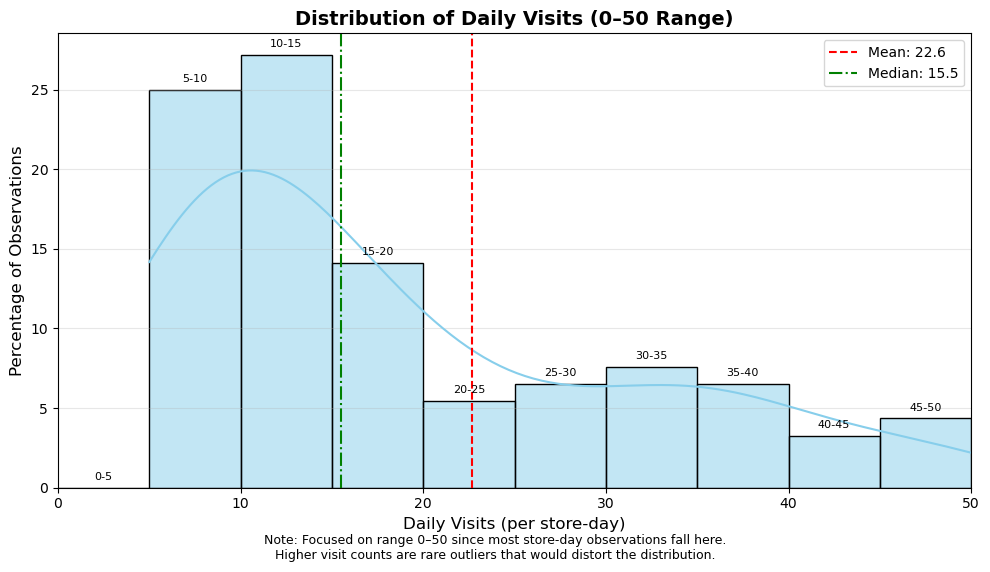

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Calculate stats ---
visits_mean = df_long["dailyvisits"].mean()
visits_median = df_long["dailyvisits"].median()

# --- Define clean bins exactly 5 visits wide from 0 to 50 ---
bins = np.arange(0, 55, 5)   # creates bins [0–5, 5–10, ..., 45–50]

# --- Filter data to 0–50 range ---
subset = df_long[df_long["dailyvisits"].between(0, 50)]

# --- Plot histogram (% of total) ---
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    subset["dailyvisits"],
    bins=bins,
    color="skyblue",
    edgecolor="black",
    kde=True,
    stat="percent"  # ← y-axis shows percentage instead of counts
)

# --- Add vertical lines for mean and median ---
plt.axvline(visits_mean, color="red", linestyle="--", linewidth=1.5, label=f"Mean: {visits_mean:.1f}")
plt.axvline(visits_median, color="green", linestyle="-.", linewidth=1.5, label=f"Median: {visits_median:.1f}")

# --- Axis settings ---
plt.xlim(0, 50)  # fix x-axis limit
plt.xlabel("Daily Visits (per store-day)", fontsize=12)
plt.ylabel("Percentage of Observations", fontsize=12)
plt.title("Distribution of Daily Visits (0–50 Range)", fontsize=14, fontweight="bold")
plt.grid(axis="y", alpha=0.3)
plt.legend()

# --- Annotate bin ranges on top of bars ---
hist, bin_edges = np.histogram(subset["dailyvisits"], bins=bins)
total = hist.sum()
for i in range(len(bin_edges)-1):
    plt.text(
        (bin_edges[i] + bin_edges[i+1]) / 2,
        (hist[i] / total) * 100 + 0.5,
        f"{int(bin_edges[i])}-{int(bin_edges[i+1])}",
        ha="center", fontsize=8
    )

# --- Add explanatory note ---
plt.figtext(
    0.5, 0.01,
    "Note: Focused on range 0–50 since most store-day observations fall here.\n"
    "Higher visit counts are rare outliers that would distort the distribution.",
    ha="center", fontsize=9
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


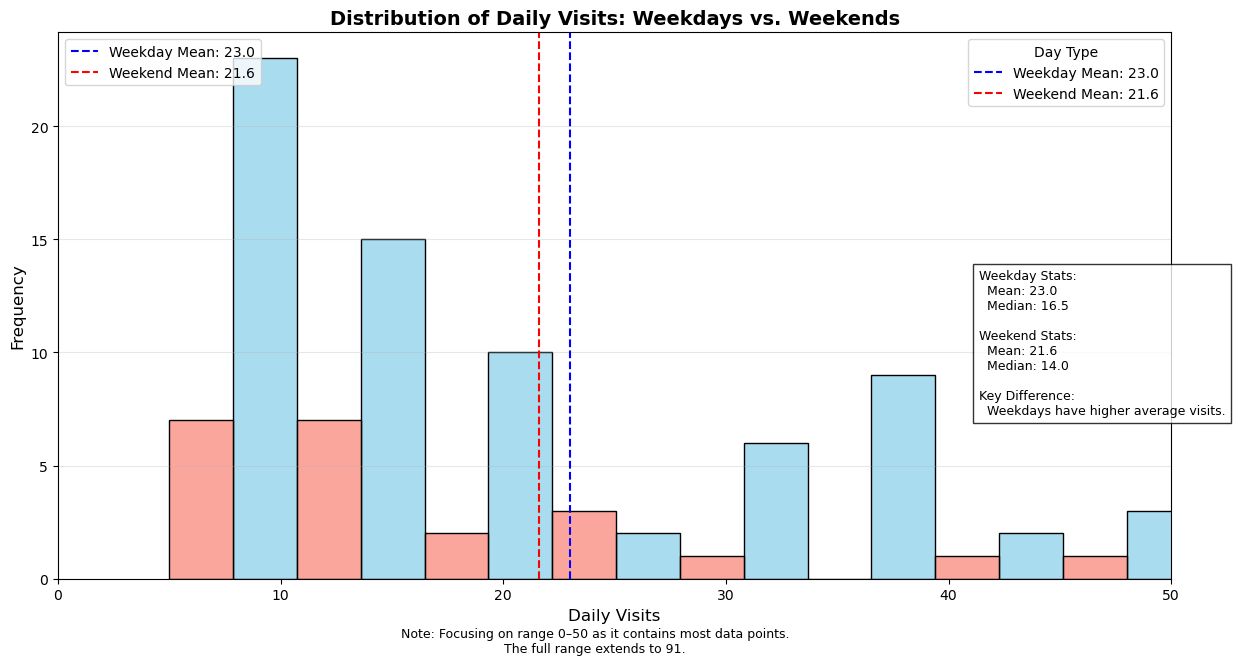

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create sample data ---
np.random.seed(42)
data = {
    'date_range_start': pd.date_range(start='2023-01-01', periods=100, freq='W'),
    'day_num': np.random.randint(1, 8, size=100),
    'dailyvisits': np.random.exponential(scale=20, size=100).astype(int) + 5
}
df_long = pd.DataFrame(data)

# --- Create date & dayofweek variables ---
df_long["date"] = df_long["date_range_start"] + pd.to_timedelta(df_long["day_num"] - 1, unit="D")
df_long["dayofweek"] = df_long["date"].dt.day_name()
df_long["is_weekend"] = df_long["dayofweek"].isin(["Saturday", "Sunday"])
df_long["day_type"] = df_long["is_weekend"].map({True: "Weekend", False: "Weekday"})

# --- Basic stats ---
visits_mean = df_long["dailyvisits"].mean()
visits_median = df_long["dailyvisits"].median()
visits_max = df_long["dailyvisits"].max()
weekday_mean = df_long.loc[~df_long["is_weekend"], "dailyvisits"].mean()
weekend_mean = df_long.loc[df_long["is_weekend"], "dailyvisits"].mean()
weekday_median = df_long.loc[~df_long["is_weekend"], "dailyvisits"].median()
weekend_median = df_long.loc[df_long["is_weekend"], "dailyvisits"].median()

# --- Define binning and range ---
bins = 15
upper_limit = 50 if visits_max > 70 and visits_median < 30 else visits_max + 10

# --- Create plot ---
plt.figure(figsize=(12, 7))
ax = sns.histplot(
    data=df_long,
    x="dailyvisits",
    hue="day_type",
    bins=bins,
    multiple="dodge",
    palette={"Weekday": "skyblue", "Weekend": "salmon"},
    alpha=0.7,
    edgecolor="black",
    linewidth=1
)

# --- Add mean lines (use labels here for second legend) ---
plt.axvline(weekday_mean, color="blue", linestyle="--", linewidth=1.5, label=f"Weekday Mean: {weekday_mean:.1f}")
plt.axvline(weekend_mean, color="red", linestyle="--", linewidth=1.5, label=f"Weekend Mean: {weekend_mean:.1f}")

# --- Axes and grid ---
plt.xlim(0, upper_limit)
plt.xlabel("Daily Visits", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Daily Visits: Weekdays vs. Weekends", fontsize=14, fontweight="bold")
plt.grid(axis="y", alpha=0.3)

# --- Combine legends (colors + mean lines) cleanly ---
# First legend: bar colors (from hue)
bar_legend = ax.legend(title="Day Type", loc="upper right", frameon=True)
plt.gca().add_artist(bar_legend)  # Keep this legend fixed

# Second legend: mean lines (placed below)
line_legend = plt.legend(loc="upper left", frameon=True)

# --- Note for range focus ---
if upper_limit < visits_max:
    plt.figtext(
        0.5, 0.01,
        f"Note: Focusing on range 0–{upper_limit} as it contains most data points.\n"
        f"The full range extends to {visits_max}.",
        ha="center", fontsize=9
    )

# --- Summary stats box (bottom right corner to avoid overlap) ---
stats_text = (
    f"Weekday Stats:\n  Mean: {weekday_mean:.1f}\n  Median: {weekday_median:.1f}\n\n"
    f"Weekend Stats:\n  Mean: {weekend_mean:.1f}\n  Median: {weekend_median:.1f}\n\n"
    f"Key Difference:\n  {'Weekends have higher' if weekend_mean > weekday_mean else 'Weekdays have higher'} average visits."
)
plt.figtext(0.82, 0.35, stats_text, fontsize=9, bbox=dict(facecolor="white", alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [49]:
import pandas as pd

# Ensure needed columns are typed correctly
df_long["date"] = pd.to_datetime(df_long["date"], errors="coerce")
df_long["dailyvisits"] = pd.to_numeric(df_long["dailyvisits"], errors="coerce")

# Build weekday label (Monday..Sunday)
df_long["dayofweek"] = df_long["date"].dt.day_name()

# Sum dailyvisits by weekday
summary = (
    df_long.groupby("dayofweek", dropna=True)["dailyvisits"]
    .sum(min_count=1)                 # keeps NaN if a group is entirely NaN
    .reset_index(name="sum_dailyvisits")
)

# Order Monday..Sunday
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
summary["dayofweek"] = pd.Categorical(summary["dayofweek"], categories=order, ordered=True)
summary = summary.sort_values("dayofweek").reset_index(drop=True)

print(summary)


   dayofweek  sum_dailyvisits
0     Monday              412
1    Tuesday              168
2  Wednesday              482
3   Thursday              342
4     Friday              343
5   Saturday              300
6     Sunday              218


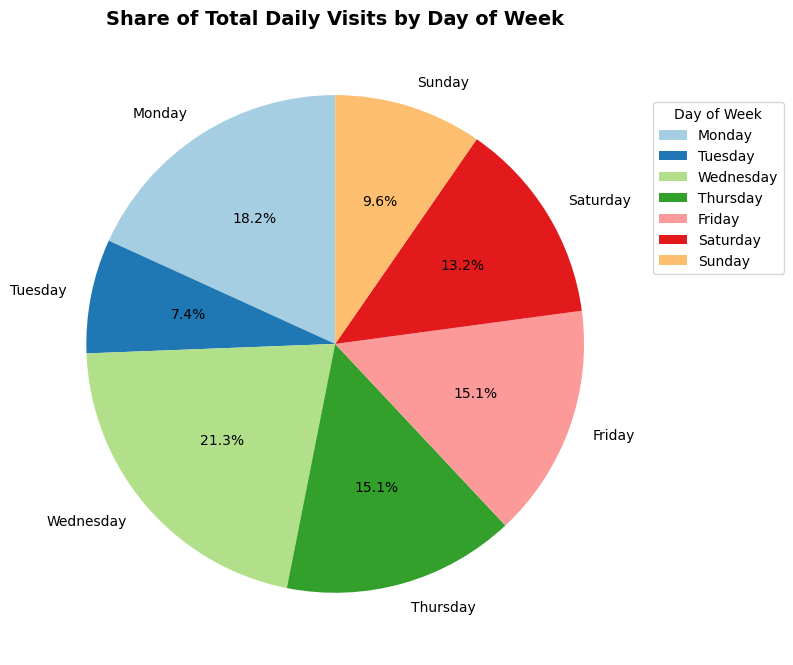

In [50]:
import matplotlib.pyplot as plt

# 1. Sum daily visits by day of week
df_long["dayofweek"] = df_long["date"].dt.day_name()
visits_by_day = df_long.groupby("dayofweek")["dailyvisits"].sum()

# 2. Sort in calendar order (Mon–Sun)
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
visits_by_day = visits_by_day.reindex(order)

# 3. Plot pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(7))  # use nice distinct color palette
plt.pie(
    visits_by_day,
    labels=visits_by_day.index,
    autopct='%1.1f%%',  # show percentages with one decimal
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

# 4. Add title and legend
plt.title("Share of Total Daily Visits by Day of Week", fontsize=14, fontweight='bold')
plt.legend(visits_by_day.index, title="Day of Week", bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.show()


In [57]:
import pandas as pd

# Use full dataset (no Maryland filter)
df_use = df_long_geo.copy()

# Ensure numeric
df_use["dailyvisits"] = pd.to_numeric(df_use["dailyvisits"], errors="coerce")

# Summary by city
city_summary = (
    df_use.groupby("city", dropna=True)["dailyvisits"]
    .agg(avg_dailyvisits="mean", median_dailyvisits="median", observations="count")
    .reset_index()
)

# Round values for readability
city_summary["avg_dailyvisits"] = city_summary["avg_dailyvisits"].round(2)
city_summary["median_dailyvisits"] = city_summary["median_dailyvisits"].round(2)

# (Optional) keep only cities with enough data (e.g., ≥ 30 obs) for stable averages
min_obs = 30
city_summary_filtered = (
    city_summary[city_summary["observations"] >= min_obs]
    .sort_values("avg_dailyvisits", ascending=False)
)

print("Average daily visits by city (all regions, cities with at least 30 observations):")
print(city_summary_filtered.head(20))


Average daily visits by city (all regions, cities with at least 30 observations):
                city  avg_dailyvisits  median_dailyvisits  observations
517           Frisco          1487.74              1220.0          1337
788        Uniondale          1290.14              1177.0          1309
430      Bloomington          1150.29               930.0          1337
822  West Des Moines          1057.11               876.0          1302
423         Bellevue          1029.51              1022.0          1742
573  King of Prussia          1016.62               913.0          1330
571          Kenwood           900.25               806.0          1421
602        Lone Tree           874.79               788.0          1833
630         Metairie           874.44               809.0          1288
450      Canoga Park           846.93               813.0          1274
750      Springfield           811.82               698.0          1721
787           Tysons           792.89               71

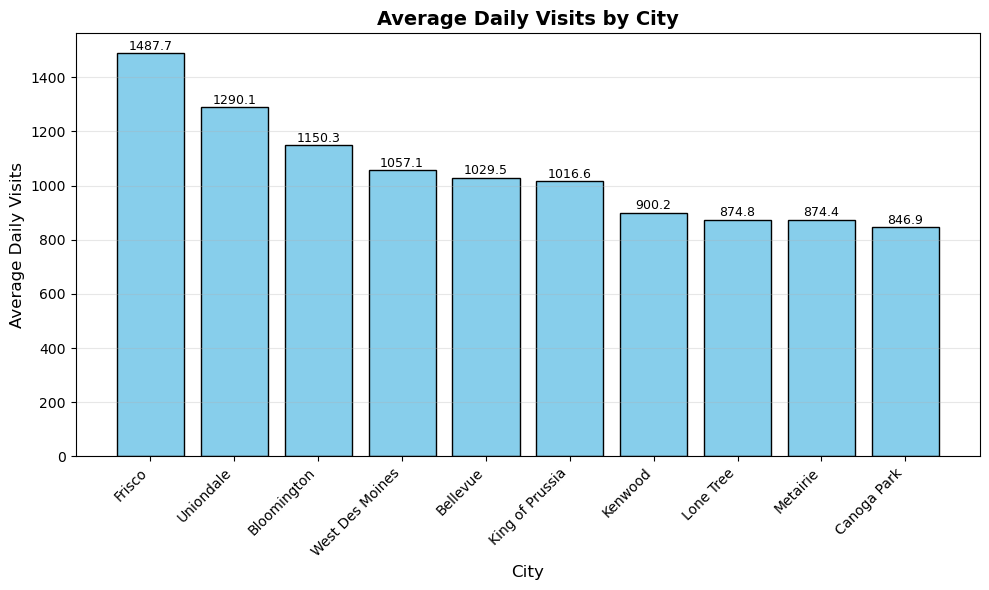

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Compute average daily visits by city 
df_long_geo["dailyvisits"] = pd.to_numeric(df_long_geo["dailyvisits"], errors="coerce")

avg_city = (
    df_long_geo.groupby("city")["dailyvisits"]
    .mean()
    .reset_index(name="avg_dailyvisits")
    .sort_values("avg_dailyvisits", ascending=False)
)
# 3) Make the plot (use top 10 for readability) 
top_n = 10
top_cities = avg_city.head(top_n)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_cities["city"], top_cities["avg_dailyvisits"], color="skyblue", edgecolor="black")

# 4) Add labels on top of each bar 
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of bar)
        height + 0.5,                      # y-position slightly above the bar
        f"{height:.1f}",                   # value label, 1 decimal place
        ha="center", va="bottom", fontsize=9
    )

# 5) Formatting 
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Daily Visits", fontsize=12)
plt.title("Average Daily Visits by City", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis="y", alpha=0.3)
plt.show()


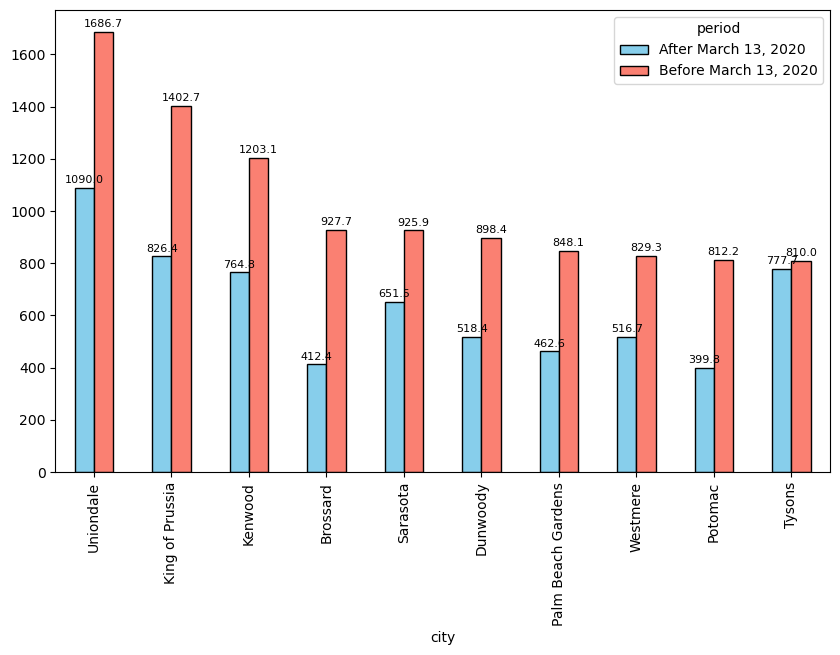

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ensure 'date' is in datetime and timezone-naive 
df_long_geo["date"] = pd.to_datetime(df_long_geo["date"], errors="coerce")

# Remove timezone info if present
if df_long_geo["date"].dt.tz is not None:
    df_long_geo["date"] = df_long_geo["date"].dt.tz_localize(None)

# Ensure numeric dailyvisits
df_long_geo["dailyvisits"] = pd.to_numeric(df_long_geo["dailyvisits"], errors="coerce")

# 2) Define cutoff date and period variable 
cutoff_date = pd.Timestamp("2020-03-13")  # timezone-naive
df_long_geo["period"] = df_long_geo["date"].apply(
    lambda d: "Before March 13, 2020" if pd.notna(d) and d <= cutoff_date else "After March 13, 2020"
)

#  3) Compute averages by city and period 
avg_visits_period = (
    df_long_geo.groupby(["city", "period"])["dailyvisits"]
    .mean()
    .reset_index()
    .sort_values("city")
)

#  4) Keep only cities with enough observations 
min_obs = 30
city_counts = df_long_geo["city"].value_counts()
valid_cities = city_counts[city_counts >= min_obs].index
avg_visits_period = avg_visits_period[avg_visits_period["city"].isin(valid_cities)]

#  5) Pivot for grouped bars ---
avg_pivot = avg_visits_period.pivot(index="city", columns="period", values="dailyvisits")
avg_pivot = avg_pivot.sort_values("Before March 13, 2020", ascending=False).head(10)

#  6) Plot bar chart 
ax = avg_pivot.plot(
    kind="bar",
    figsize=(10, 6),
    color=["skyblue", "salmon"],
    edgecolor="black"
)

# 7) Label bars 
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=8, label_type="edge", padding=2)

#  8) Titles, labels, legend


In [60]:
import pandas as pd

# --- 1) Ensure 'date' and 'dailyvisits' are clean ---
df_long_geo["date"] = pd.to_datetime(df_long_geo["date"], errors="coerce")
df_long_geo["dailyvisits"] = pd.to_numeric(df_long_geo["dailyvisits"], errors="coerce")

# --- 2) Create a 'year-month' column ---
df_long_geo["year_month"] = df_long_geo["date"].dt.to_period("M").astype(str)

# --- 3) Compute average daily visits by month ---
monthly_avg = (
    df_long_geo.groupby("year_month")["dailyvisits"]
    .mean()
    .reset_index(name="average_dailyvisits")
    .sort_values("year_month")
)

# --- 4) Round for readability ---
monthly_avg["average_dailyvisits"] = monthly_avg["average_dailyvisits"].round(2)

# --- 5) Display result ---
print("Average Daily Visits by Month:")
print(monthly_avg.to_string(index=False))


Average Daily Visits by Month:
year_month  average_dailyvisits
   2018-01                36.72
   2018-02                36.44
   2018-03                43.47
   2018-04                41.62
   2018-05                42.58
   2018-06                45.99
   2018-07                50.79
   2018-08                53.89
   2018-09                49.76
   2018-10                49.02
   2018-11                57.88
   2018-12                73.62
   2019-01               140.84
   2019-02               149.37
   2019-03               172.15
   2019-04               171.06
   2019-05               178.16
   2019-06               189.48
   2019-07               185.62
   2019-08               191.62
   2019-09               178.01
   2019-10               156.48
   2019-11               182.38
   2019-12               217.25
   2020-01               147.16
   2020-02               147.63
   2020-03                73.91
   2020-04                12.88
   2020-05                30.18
   2020-0

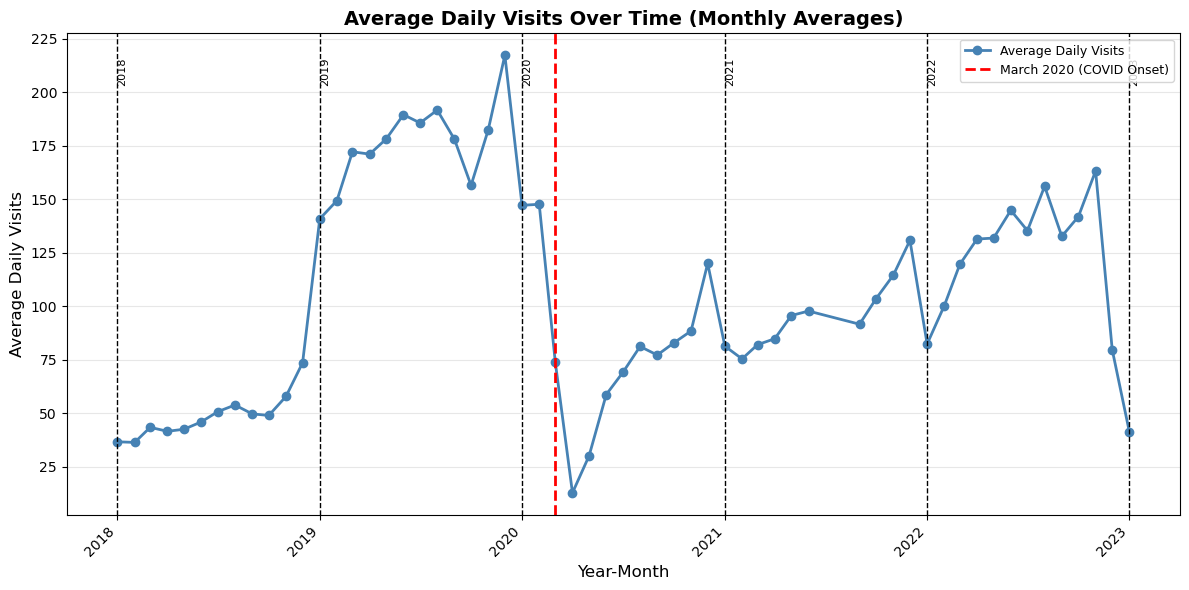

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1) Ensure 'date' and 'dailyvisits' are valid ---
df_long_geo["date"] = pd.to_datetime(df_long_geo["date"], errors="coerce")
df_long_geo["dailyvisits"] = pd.to_numeric(df_long_geo["dailyvisits"], errors="coerce")

# --- 2) Drop rows with missing dates ---
df_clean = df_long_geo.dropna(subset=["date"]).copy()

# --- 3) Create clean 'year_month' column ---
df_clean["year_month"] = (
    df_clean["date"].dt.year.astype(int).astype(str)
    + "-" +
    df_clean["date"].dt.month.astype(str).str.zfill(2)
)

# --- 4) Compute monthly averages ---
monthly_avg = (
    df_clean.groupby("year_month")["dailyvisits"]
    .mean()
    .reset_index(name="average_dailyvisits")
    .sort_values("year_month")
)

# --- 5) Convert 'year_month' safely to datetime for plotting ---
monthly_avg["year_month"] = pd.to_datetime(monthly_avg["year_month"], format="%Y-%m", errors="coerce")

# --- 6) Plot line chart ---
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_avg["year_month"],
    monthly_avg["average_dailyvisits"],
    color="steelblue",
    linewidth=2,
    marker="o",
    label="Average Daily Visits"
)

# --- 7) Add vertical lines for each new year (black) ---
for year in monthly_avg["year_month"].dt.year.dropna().unique():
    plt.axvline(pd.Timestamp(f"{int(year)}-01-01"), color="black", linestyle="--", linewidth=1)
    plt.text(pd.Timestamp(f"{int(year)}-01-01"), plt.ylim()[1]*0.95, str(int(year)),
             rotation=90, verticalalignment="top", fontsize=8, color="black")

# --- 8) Add red line for March 2020 (COVID onset) ---
plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle="--", linewidth=2, label="March 2020 (COVID Onset)")

# --- 9) Format chart ---
plt.title("Average Daily Visits Over Time (Monthly Averages)", fontsize=14, fontweight="bold")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Average Daily Visits", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.legend(loc="upper right", fontsize=9)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


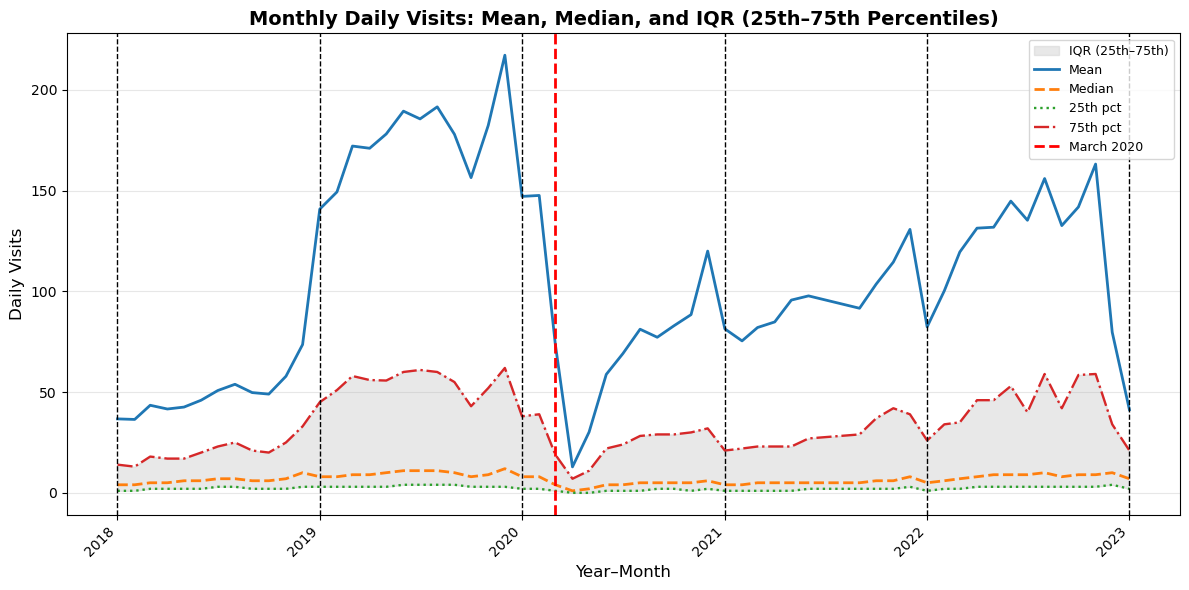

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Clean inputs ---
df_long_geo["date"] = pd.to_datetime(df_long_geo["date"], errors="coerce")
df_long_geo["dailyvisits"] = pd.to_numeric(df_long_geo["dailyvisits"], errors="coerce")

# Drop rows with missing dates (can't assign a month without a valid date)
dfm = df_long_geo.dropna(subset=["date"]).copy()

# --- 2) Build year-month key and aggregate monthly stats ---
dfm["year_month"] = (
    dfm["date"].dt.year.astype(int).astype(str)
    + "-" +
    dfm["date"].dt.month.astype(str).str.zfill(2)
)

monthly = (
    dfm.groupby("year_month")["dailyvisits"]
       .agg(
            mean="mean",
            median="median",
            p25=lambda s: s.quantile(0.25),
            p75=lambda s: s.quantile(0.75),
       )
       .reset_index()
       .sort_values("year_month")
)

# Convert year_month to datetime for plotting
monthly["year_month"] = pd.to_datetime(monthly["year_month"], format="%Y-%m", errors="coerce")

# --- 3) Plot ---
plt.figure(figsize=(12, 6))

# Shade between 25th and 75th percentiles (IQR)
plt.fill_between(
    monthly["year_month"], monthly["p25"], monthly["p75"],
    color="lightgrey", alpha=0.5, label="IQR (25th–75th)"
)

# Four lines: mean, median, p25, p75
plt.plot(monthly["year_month"], monthly["mean"],   label="Mean",   linewidth=2)
plt.plot(monthly["year_month"], monthly["median"], label="Median", linewidth=2, linestyle="--")
plt.plot(monthly["year_month"], monthly["p25"],    label="25th pct", linestyle=":", linewidth=1.7)
plt.plot(monthly["year_month"], monthly["p75"],    label="75th pct", linestyle="-.", linewidth=1.7)

# --- 4) Vertical lines: each New Year (black) + March 2020 (red) ---
for y in monthly["year_month"].dt.year.dropna().unique():
    xmark = pd.Timestamp(f"{int(y)}-01-01")
    plt.axvline(xmark, color="black", linestyle="--", linewidth=1)
plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle="--", linewidth=2, label="March 2020")

# --- 5) Labels, legend, formatting ---
plt.title("Monthly Daily Visits: Mean, Median, and IQR (25th–75th Percentiles)", fontsize=14, fontweight="bold")
plt.xlabel("Year–Month", fontsize=12)
plt.ylabel("Daily Visits", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.legend(loc="best", fontsize=9)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


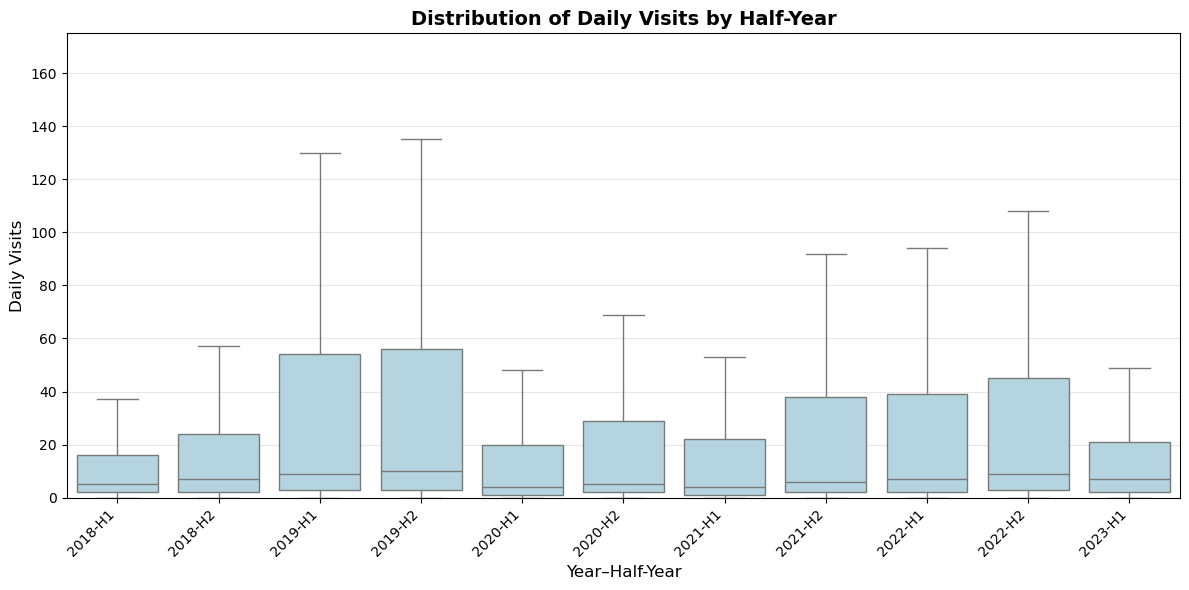

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy and clean
df = df_long_geo.copy()
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["dailyvisits"] = pd.to_numeric(df["dailyvisits"], errors="coerce")
df = df.dropna(subset=["date", "dailyvisits"])

# Create half-year labels (H1 = Jan–Jun, H2 = Jul–Dec)
q = df["date"].dt.quarter
df["year_half"] = df["date"].dt.year.astype(int).astype(str) + "-H" + ((q <= 2).map({True: 1, False: 2}).astype(str))

# Order labels chronologically
order = sorted(df["year_half"].dropna().unique())

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="year_half",
    y="dailyvisits",
    order=order,
    showfliers=False,
    color="lightblue"
)

# Style
plt.title("Distribution of Daily Visits by Half-Year", fontsize=14, fontweight="bold")
plt.xlabel("Year–Half-Year", fontsize=12)
plt.ylabel("Daily Visits", fontsize=12)
plt.ylim(0, 175)             # cap y-axis for readability
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [74]:
import pandas as pd

# Example structure — replace this with your actual stock data variable name or import path
df_stock = df_LULU.copy()   # if your stock data is in df_LULU

# Make sure column names are correct
df_stock = df_stock.rename(columns={"date": "date", "price": "price"})

# Now re-run the analysis
df_stock["date"] = pd.to_datetime(df_stock["date"], errors="coerce")
df_stock["year_month"] = df_stock["date"].dt.to_period("M")

avg_price_by_month = (
    df_stock.groupby("year_month")["price"]
    .mean()
    .reset_index()
    .rename(columns={"price": "avg_stockprice"})
)

avg_price_by_month = avg_price_by_month.sort_values("year_month")
avg_price_by_month["year_month"] = avg_price_by_month["year_month"].astype(str)
avg_price_by_month["avg_stockprice"] = avg_price_by_month["avg_stockprice"].round(2)

print("Average Stock Price by Month:")
print(avg_price_by_month)


Average Stock Price by Month:
   year_month  avg_stockprice
0     2018-01           78.93
1     2018-02           79.69
2     2018-03           81.40
3     2018-04           93.54
4     2018-05          101.39
5     2018-06          125.24
6     2018-07          125.28
7     2018-08          132.37
8     2018-09          155.84
9     2018-10          145.08
10    2018-11          133.90
11    2018-12          120.92
12    2019-01          141.00
13    2019-02          149.66
14    2019-03          147.81
15    2019-04          171.56
16    2019-05          172.72
17    2019-06          176.94
18    2019-07          187.74
19    2019-08          180.77
20    2019-09          192.65
21    2019-10          200.60
22    2019-11          212.15
23    2019-12          227.82
24    2020-01          239.70
25    2020-02          246.89
26    2020-03          188.49
27    2020-04          207.52
28    2020-05          250.11
29    2020-06          306.87
30    2020-07          317.24
31    2020

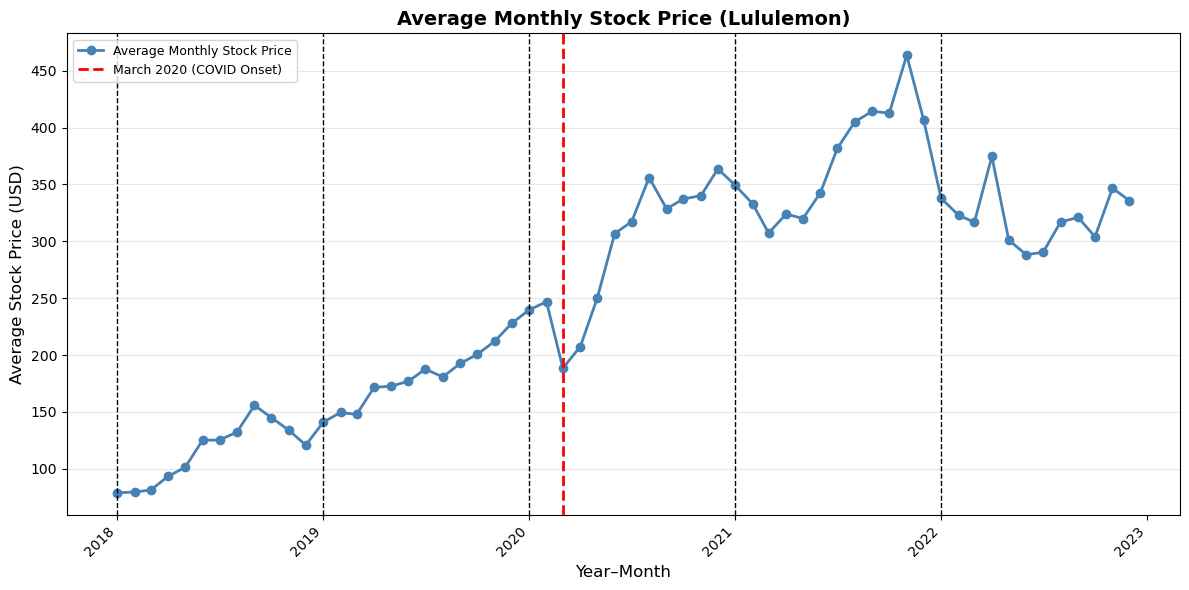

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Make sure your stock data is loaded and clean ---
# (Assuming df_LULU is your stock price dataset)
df_stock = df_LULU.copy()

# Ensure correct data types
df_stock["date"] = pd.to_datetime(df_stock["date"], errors="coerce")
df_stock["price"] = pd.to_numeric(df_stock["price"], errors="coerce")

# --- 2) Create year-month variable ---
df_stock["year_month"] = df_stock["date"].dt.to_period("M").astype(str)

# --- 3) Compute monthly average stock price ---
avg_stock_monthly = (
    df_stock.groupby("year_month")["price"]
    .mean()
    .reset_index(name="avg_stockprice")
    .sort_values("year_month")
)

# --- 4) Convert to datetime for plotting ---
avg_stock_monthly["year_month"] = pd.to_datetime(avg_stock_monthly["year_month"], format="%Y-%m", errors="coerce")

# --- 5) Plot the line chart ---
plt.figure(figsize=(12, 6))
plt.plot(
    avg_stock_monthly["year_month"],
    avg_stock_monthly["avg_stockprice"],
    color="steelblue",
    linewidth=2,
    marker="o",
    label="Average Monthly Stock Price"
)

# --- 6) Add vertical lines for each January (black) ---
for year in avg_stock_monthly["year_month"].dt.year.dropna().unique():
    plt.axvline(pd.Timestamp(f"{int(year)}-01-01"), color="black", linestyle="--", linewidth=1)

# --- 7) Add red line for March 2020 (COVID onset) ---
plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle="--", linewidth=2, label="March 2020 (COVID Onset)")

# --- 8) Format chart ---
plt.title("Average Monthly Stock Price (Lululemon)", fontsize=14, fontweight="bold")
plt.xlabel("Year–Month", fontsize=12)
plt.ylabel("Average Stock Price (USD)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.legend(loc="upper left", fontsize=9)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


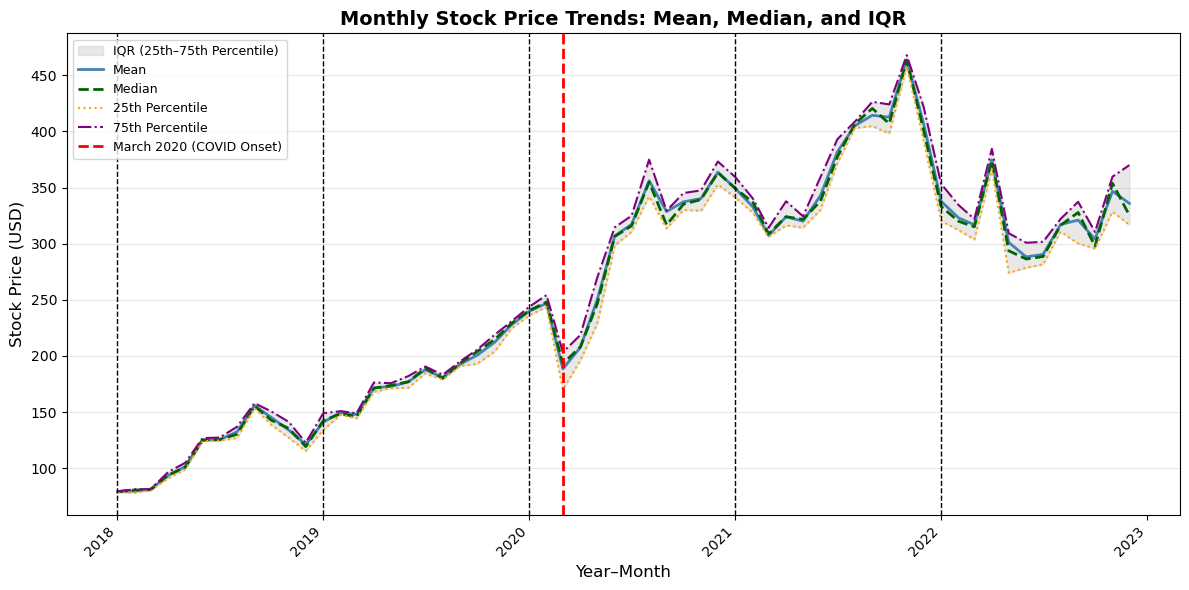

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Prepare and clean stock data ---
df_stock = df_LULU.copy()  # use your stock dataset
df_stock["date"] = pd.to_datetime(df_stock["date"], errors="coerce")
df_stock["price"] = pd.to_numeric(df_stock["price"], errors="coerce")

# --- 2) Create year-month variable ---
df_stock["year_month"] = df_stock["date"].dt.to_period("M").astype(str)

# --- 3) Compute monthly summary stats ---
monthly_stats = (
    df_stock.groupby("year_month")["price"]
    .agg(
        mean="mean",
        median="median",
        p25=lambda x: x.quantile(0.25),
        p75=lambda x: x.quantile(0.75)
    )
    .reset_index()
    .sort_values("year_month")
)

# --- 4) Convert year_month to datetime for plotting ---
monthly_stats["year_month"] = pd.to_datetime(monthly_stats["year_month"], format="%Y-%m", errors="coerce")

# --- 5) Plot the four lines ---
plt.figure(figsize=(12, 6))

# Shaded IQR region (25th–75th percentile)
plt.fill_between(
    monthly_stats["year_month"],
    monthly_stats["p25"],
    monthly_stats["p75"],
    color="lightgrey",
    alpha=0.5,
    label="IQR (25th–75th Percentile)"
)

# Lines for mean, median, and percentiles
plt.plot(monthly_stats["year_month"], monthly_stats["mean"], color="steelblue", linewidth=2, label="Mean")
plt.plot(monthly_stats["year_month"], monthly_stats["median"], color="darkgreen", linestyle="--", linewidth=2, label="Median")
plt.plot(monthly_stats["year_month"], monthly_stats["p25"], color="orange", linestyle=":", linewidth=1.5, label="25th Percentile")
plt.plot(monthly_stats["year_month"], monthly_stats["p75"], color="purple", linestyle="-.", linewidth=1.5, label="75th Percentile")

# --- 6) Add vertical lines for each January (black) ---
for year in monthly_stats["year_month"].dt.year.dropna().unique():
    plt.axvline(pd.Timestamp(f"{int(year)}-01-01"), color="black", linestyle="--", linewidth=1)

# --- 7) Add red line for March 2020 (COVID onset) ---
plt.axvline(pd.Timestamp("2020-03-01"), color="red", linestyle="--", linewidth=2, label="March 2020 (COVID Onset)")

# --- 8) Style the chart ---
plt.title("Monthly Stock Price Trends: Mean, Median, and IQR", fontsize=14, fontweight="bold")
plt.xlabel("Year–Month", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.legend(loc="upper left", fontsize=9)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()
